In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special
%matplotlib inline

In [2]:
def phi(x, n):
    """
    2nd Derivative of Tn(x)
    https://en.wikipedia.org/wiki/Chebyshev_polynomials#Differentiation_and_integration
    """
    Tn = scipy.special.chebyt(n)(x)
    Un = scipy.special.chebyu(n)(x)
    return n * ((n+1)*Tn - Un) / (x**2 - 1)

In [52]:
n = 20
x = np.linspace(-1,1,n)
A = np.zeros((n,n))

# BOundary conditions
for j in range(0,n):
    Tj = scipy.special.chebyt(j)(-1)
    A[0,j] = Tj 
    Tj = scipy.special.chebyt(j)(1)
    A[-1,j] = Tj
    
# u'' = f collocation
for j in range(0,n):
    A[1:-1,j] = phi(x[1:-1], j)

In [53]:
# rhs
f = np.zeros(n)
f[0] = 3
f[-1] = -3

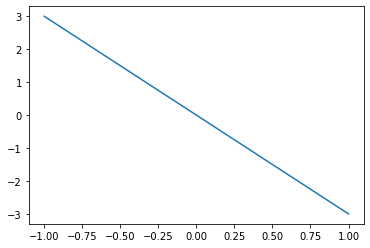

In [54]:
alpha = np.linalg.solve(A, f)
u = np.polynomial.chebyshev.chebval(x, alpha)
plt.plot(x, u)

Change the rhs

In [57]:
k=2
f = -(k*np.pi)**2 * np.sin(2*np.pi*x)
uexact = np.sin(k*np.pi*x) + 3*x + 4
f[0] = uexact[0]
f[-1] = uexact[-1]
f

array([  1.        , -24.24814597, -38.27038852, -36.15328182,
       -18.78964994,   6.49793397,  29.04521579,  39.34357879,
        33.05000783,  12.81862124, -12.81862124, -33.05000783,
       -39.34357879, -29.04521579,  -6.49793397,  18.78964994,
        36.15328182,  38.27038852,  24.24814597,   7.        ])

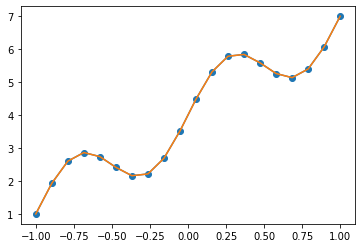

In [58]:
alpha = np.linalg.solve(A, f)
u = np.polynomial.chebyshev.chebval(x, alpha)
plt.plot(x, u, '-o')
plt.plot(x, uexact)